MOHAMMAD ISHAQ 


TRAVEL INSURANCE

**BUSINESS PROBLEM UNDERSTANDING**

Context:
Asuransi perjalanan adalah asuransi yang ditujukan untuk menutup biaya yang timbul akibat pengobatan, pembatalan perjalanan, bagasi hilang,
insiden dalam perjalanan, dan kerugian lain yang timbul selama perjalanan, baik perjalanan domestik maupun internasional. Asuransi perjalanan 
biasanya dapat dipesan bersamaan dengan pemesanan tiket atau dipesan secara terpisah. Beberapa asuransi menawarkan opsi biaya kesehatan yang 
lebih murah atau lebih mahal, tergantung keinginan klien.

Problem Statement:
Penipuan asuransi adalah setiap tindakan yang dilakukan untuk menipu proses asuransi. Ini terjadi ketika penggugat mencoba untuk mendapatkan 
beberapa manfaat atau keuntungan yang tidak berhak mereka dapatkan, atau ketika perusahaan asuransi dengan sengaja menolak beberapa manfaat 
yang seharusnya diberikan.

Goals:
Menentukan kebenaran insurance claim dari passenger kalau memang benar kejadian yang tidak diinginkan tidak disengaja hanya untuk mendapatkan
imbalan dari asuransi melainkan memang tidak disengaja. 
Memastikan polis asuransi dimengerti dan diaplikasikan pada claim asuransi yang berlaku

Analytic approach:
Menginvestigasi secara detil kejadian terjadi apakah sesuai polis yang berlaku dan tidak disengajakan.

**DATA UNDERSTANDING**

In [201]:
#Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [202]:
#Loading Dataset
df = pd.read_csv("data_travel_insurance (1).csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


DATA CLEANING

Kita melakukan Data Cleaning untuk memperbaiki data dan menggelompokan jumlah unique number serta uniqueSample dari setiap kategori kolom 
dari dataset agar dapat mempermudah pembacaan dataset serta membuat model machine learning dan analisisnya

In [204]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.00,16,"[ART, RAB]"
1,Agency Type,object,0,0.00,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,0.00,2,"[Online, Offline]"
3,Product Name,object,0,0.00,26,"[Gold Plan, Rental Vehicle Excess Insurance]"
4,Gender,object,31647,71.39,2,"[nan, M]"
5,Duration,int64,0,0.00,437,"[7, 396]"
6,Destination,object,0,0.00,138,"[PAPUA NEW GUINEA, KOREA, DEMOCRATIC PEOPLE'S ..."
7,Net Sales,float64,0,0.00,1006,"[169.0, 44.5]"
8,Commision (in value),float64,0,0.00,915,"[45.6, 72.0]"
9,Age,int64,0,0.00,89,"[42, 14]"


In [205]:
Claim = df.groupby('Claim').sum()
print(Claim)

       Duration   Net Sales  Commision (in value)      Age
Claim                                                     
No      2118597  1734198.97             412775.81  1743716
Yes       72283    63343.46              17546.74    26106


In [206]:
df['Claim'].unique()

array(['No', 'Yes'], dtype=object)

Kita dapat melihat diatas bahwa hasil claim hanya "No" dan "Yes", lalu kita harus menentukan hasil true positive dari hasil "Yes".

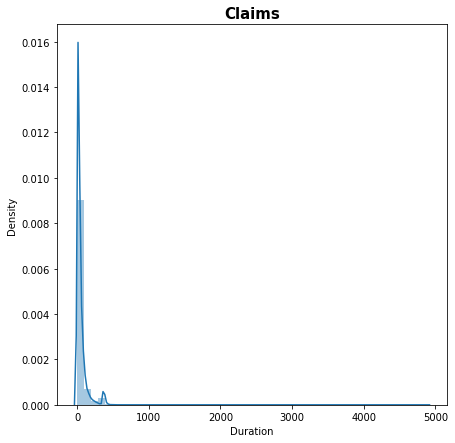

In [207]:
plt.figure(figsize=(7, 7))
sns.distplot(df['Duration'])
plt.title('Claims', size=15, weight='bold');

Berdasarkan plot distribusi claims berdasarkan durasi di atas, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur duration.

In [208]:
print(f"Total passenger per destination:\n{df['Destination'].value_counts()}")
print(f"\n Flight out Age:\n{df['Age'].value_counts()}")

Total passenger per destination:
SINGAPORE           9267
MALAYSIA            4139
THAILAND            4122
CHINA               3396
AUSTRALIA           2578
                    ... 
JAMAICA                1
ANGOLA                 1
FRENCH POLYNESIA       1
NIGERIA                1
REUNION                1
Name: Destination, Length: 138, dtype: int64

 Flight out Age:
36    16971
31     1852
48     1714
35     1689
30      930
      ...  
3         2
5         2
0         2
2         1
4         1
Name: Age, Length: 89, dtype: int64


Kita klasifikasikan total penumpang pada destinasi yang dituju dengan umur penumpang.

In [209]:
df.groupby(['Destination', 'Age'])['Age'].count()

Destination  Age
ANGOLA       19     1
ARGENTINA    28     1
             30     1
             31     1
             35     1
                   ..
VIET NAM     73     1
             74     1
             75     3
ZAMBIA       36     2
ZIMBABWE     36     3
Name: Age, Length: 2139, dtype: int64

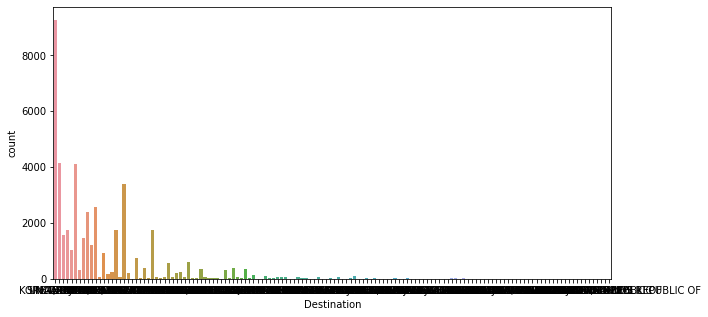

In [210]:
plt.figure(figsize = (10,5))
sns.countplot(df['Destination'])
plt.show()

<Figure size 720x720 with 0 Axes>

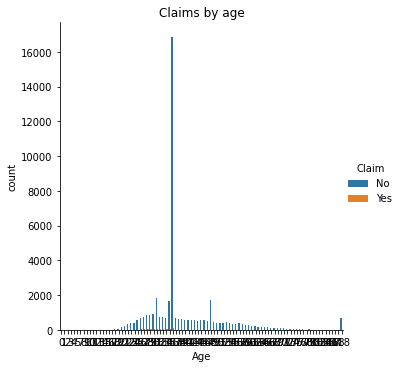

<Figure size 720x720 with 0 Axes>

In [211]:
sns.catplot(x='Age', kind='count', hue='Claim', data=df);
plt.title('Claims by age');
plt.figure(figsize=(10,10))

Dapat dilihat pada plot diatas kalau jumlah claim 'Yes' sangat kecil berdasarkan Age dan 'No' lebih banyak

**Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya.
Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi
dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [212]:
df_model = df.copy()

In [213]:
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.00,16,"[RAB, CSR]"
1,Agency Type,object,0,0.00,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.00,2,"[Offline, Online]"
3,Product Name,object,0,0.00,26,"[Rental Vehicle Excess Insurance, Annual Trave..."
4,Gender,object,31647,71.39,2,"[M, nan]"
5,Duration,int64,0,0.00,437,"[182, 60]"
6,Destination,object,0,0.00,138,"[BENIN, PHILIPPINES]"
7,Net Sales,float64,0,0.00,1006,"[-75.0, 182.0]"
8,Commision (in value),float64,0,0.00,915,"[3.9, 11.75]"
9,Age,int64,0,0.00,89,"[4, 73]"


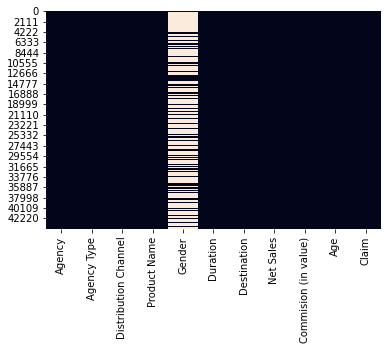

In [214]:
sns.heatmap(df_model.isnull(), cbar=False);

In [215]:
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

In [216]:
df.isna().sum()/df.shape[0]*100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Gender                  71.392799
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Age                      0.000000
Claim                    0.000000
dtype: float64

Dapat dilihat dari heatmap diatas bahwa missing value hanya ada pada kolom Gender dengan jumlah 31647 / 71.4%

Kita juga dapat harus mengecek apakah dataset dibawah memiliki data yang terduplicate atau tidak dengan menggunakan function duplicated().

In [217]:
df_model.duplicated().sum()

4667

Terdapat 4667 duplicated data pada dateset kita.
Baris data yang memiliki nilai yang sama persis untuk tiap kolomnya kurang berguna untuk dipertahankan. Data duplikat juga sangat 
mungkin akan mempengaruhi akurasi model machine learning. Kita dapat menemukan data duplikat dengan function duplicated() dan menghapusnya dengan drop_duplicated().

In [218]:
df.drop_duplicates(subset=None, keep='first', inplace=False)

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [219]:
df.drop_duplicates(keep=False, inplace=True)

In [220]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [221]:
display(df[df['Gender'].isna()]['Claim'].value_counts(),
df[df['Gender'].isna()]['Destination'].value_counts())

No     25317
Yes      202
Name: Claim, dtype: int64

THAILAND            2461
SINGAPORE           2439
AUSTRALIA           2189
MALAYSIA            2174
CHINA               1753
                    ... 
FRENCH POLYNESIA       1
NIGERIA                1
NAMIBIA                1
URUGUAY                1
REUNION                1
Name: Destination, Length: 132, dtype: int64

In [222]:
index_nan=df.loc[df['Gender'].isna()].index

In [223]:
df['Gender']=df.groupby('Claim')['Age'].apply(lambda x: x.fillna(x.describe(include='object')))

In [224]:
df.loc[index_nan]['Gender'].value_counts()

36    11545
35     1200
31     1193
48      926
28      437
      ...  
77        2
82        2
78        2
13        1
86        1
Name: Gender, Length: 67, dtype: int64

In [225]:
df[['Gender']].isna().sum()

Gender    0
dtype: int64

In [226]:
df[df['Gender'].isna()]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim


Sudah terlihat bahwa missing value pada kolom gender sudah menjadi 0

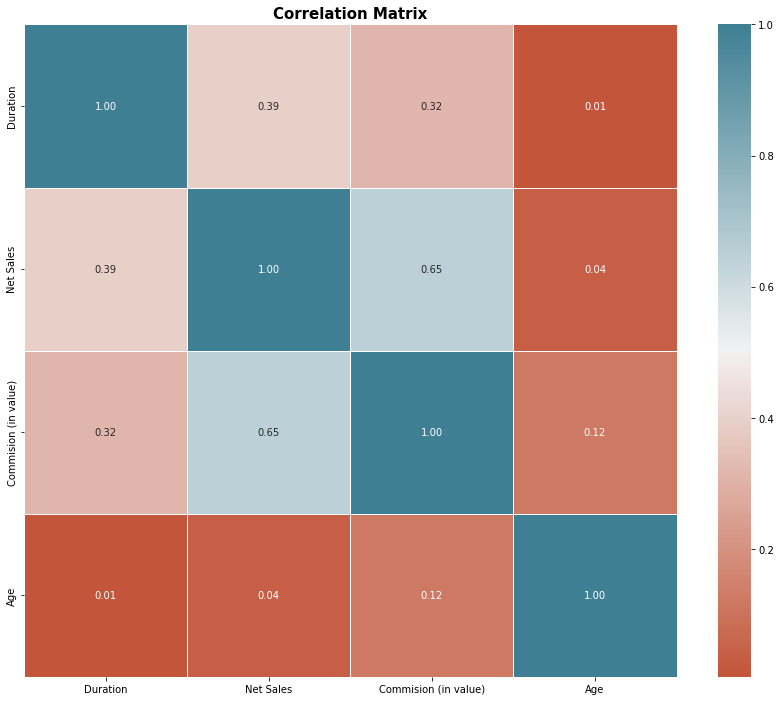

In [227]:
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Correlation Matrix tersebut menunjukan keterkaitannya duration, net sales, commision dan age dengan nilai paling tinggi yaitu 0.65 antara commision dengan net sales.


**OUTLIERS DETECTION**

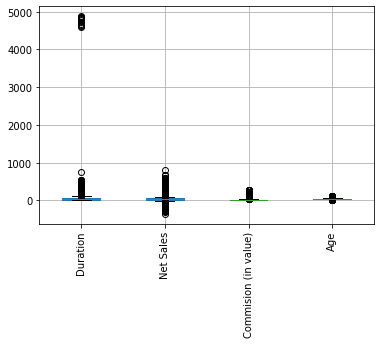

In [228]:
df_model.boxplot(rot=90);

Terlihat ada banyak outliers pada keempat kolom duration, net sales, commision dan age. Dalam project ini, akan saya bersihkan dataset dari outliers dan membuat 
beberapa rekayasa untuk mempertimbangkan kombinasi antara hasil dari IQR dan domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing 
baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [229]:
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')     

In [230]:
find_anomalies(df_model['Duration'])

IQR: 44.0
limit_bawah: -57.0
limit_atas: 119.0


In [231]:
find_anomalies(df_model['Net Sales'])

IQR: 30.0
limit_bawah: -27.0
limit_atas: 93.0


In [232]:
find_anomalies(df_model['Commision (in value)'])

IQR: 11.55
limit_bawah: -17.325000000000003
limit_atas: 28.875000000000004


In [233]:
find_anomalies(df_model['Age'])

IQR: 8.0
limit_bawah: 23.0
limit_atas: 55.0


In [234]:
df_model['Claim'].describe()

count     44328
unique        2
top          No
freq      43651
Name: Claim, dtype: object

Ada 44328 baris dari kolom claim yang menentukan 1 dari 2 opsi yaitu 'Yes' atau 'No'.

In [235]:
df.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Gender                    int64
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Age                       int64
Claim                    object
dtype: object

In [236]:
df["Gender"]=df["Gender"].astype("float64")
m=round(df["Gender"].mean(),2)

In [237]:
df["Gender"].fillna(m,inplace=True)
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
2,JZI,Airlines,Online,Basic Plan,26.0,19,INDIA,22.0,7.70,26,No
4,C2B,Airlines,Online,Bronze Plan,28.0,8,SINGAPORE,16.0,4.00,28,No
6,EPX,Travel Agency,Online,1 way Comprehensive Plan,36.0,25,"KOREA, REPUBLIC OF",50.0,0.00,36,No
7,EPX,Travel Agency,Online,Cancellation Plan,22.0,90,SINGAPORE,78.0,0.00,22,No
8,JZI,Airlines,Online,Basic Plan,39.0,4,THAILAND,22.0,7.70,39,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,36.0,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,47.0,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,50.0,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,36.0,51,CHINA,36.0,0.00,36,No


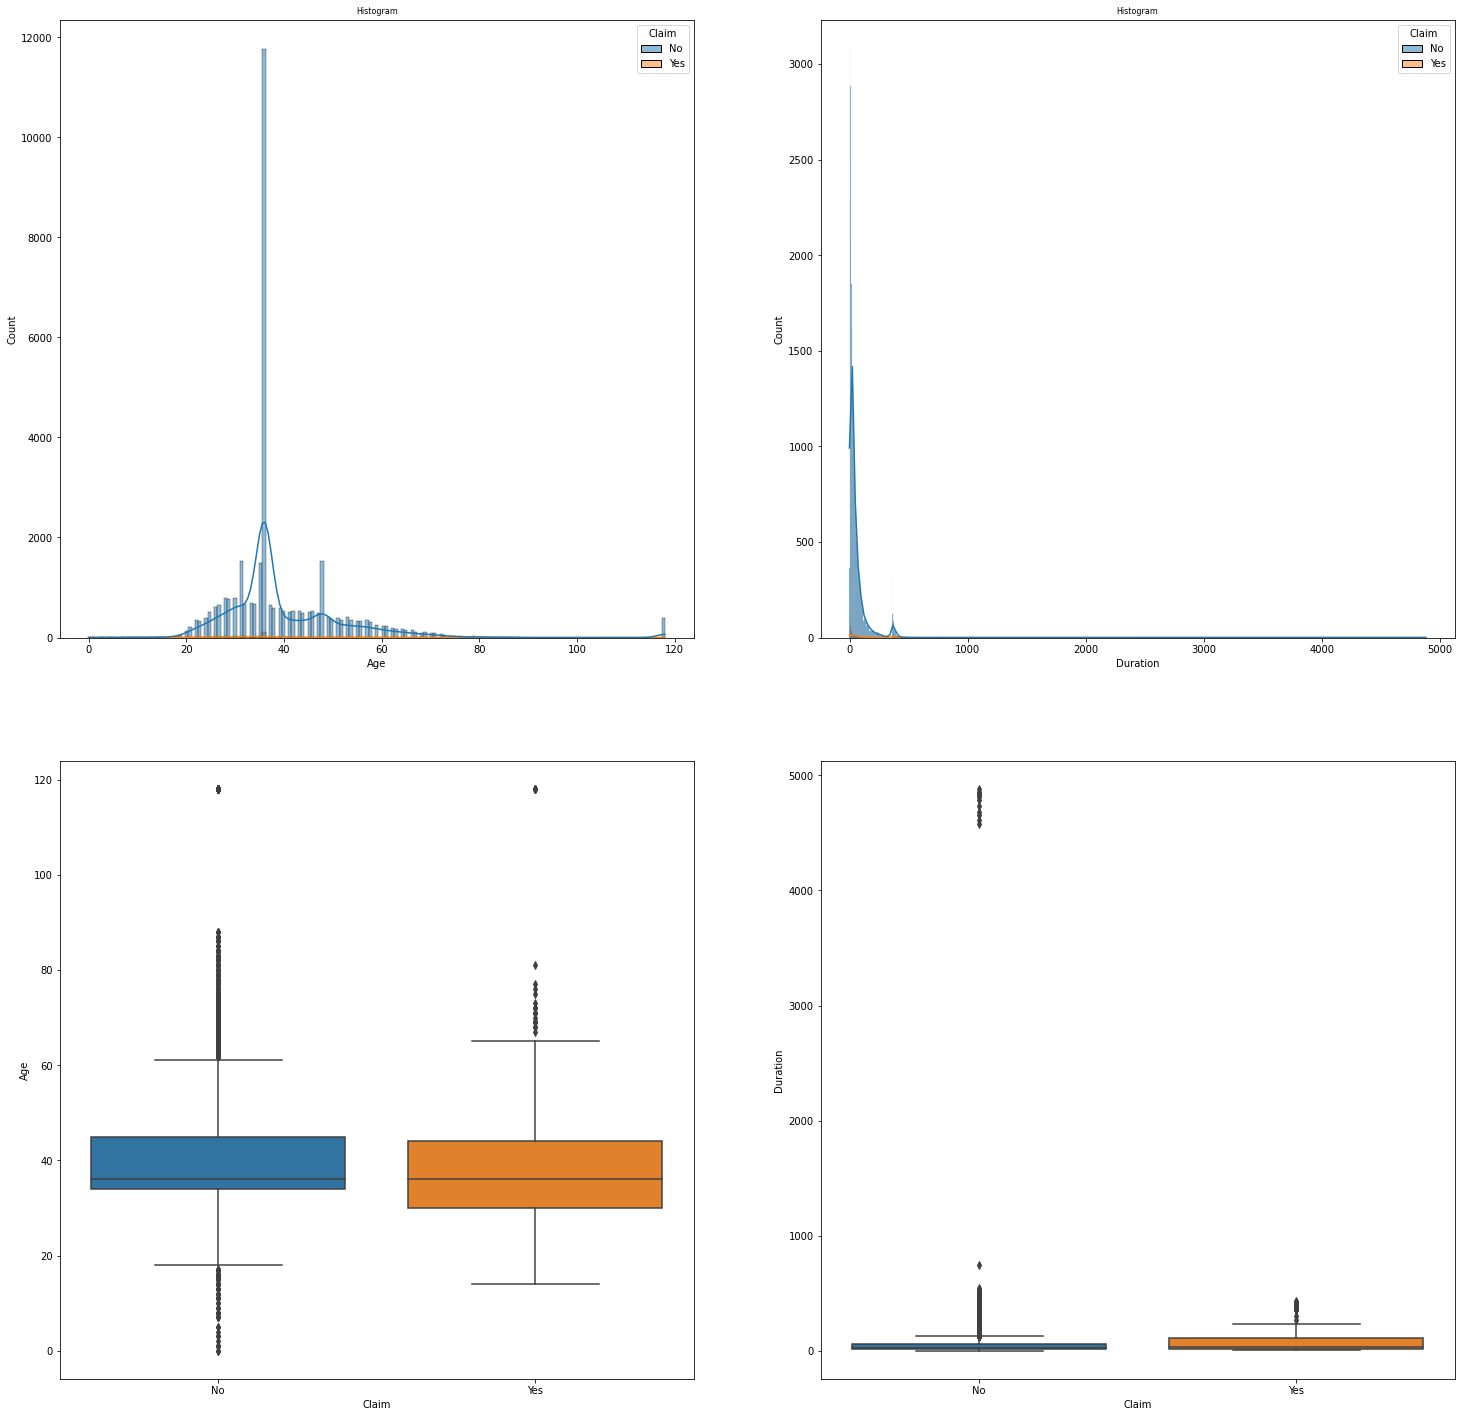

In [238]:
plt.figure(figsize=(25,25))

plt.subplot(221)
sns.histplot(data=df,x='Age',hue='Claim',kde=True)
plt.title('Histogram',fontsize=8)

plt.subplot(222)
sns.histplot(data=df,x='Duration',hue='Claim',kde=True)
plt.title('Histogram',fontsize=8)

plt.subplot(223)
sns.boxplot(data=df,y='Age', x='Claim')

plt.subplot(224)
sns.boxplot(data=df,y='Duration', x='Claim')
plt.show()

Berdasarkan histogram dan boxplot diatas, kita dapat menyimpulkan bahwa terlihat perbedaan distribusi Age dari target yang 0 (tidak tertarik) dan target yang 1 (yang tertarik), dimana yang tertarik biasa Age nya lebih rendah dari yang tidak tertarik.

Sedangkan kalau distribusi Duration kurang lebih sama antara target 0 dan 1. Dimana berarti kemungkinan Duration ini tidak mempengaruhi seorang kandidat jadi tertarik dan tidaknya.

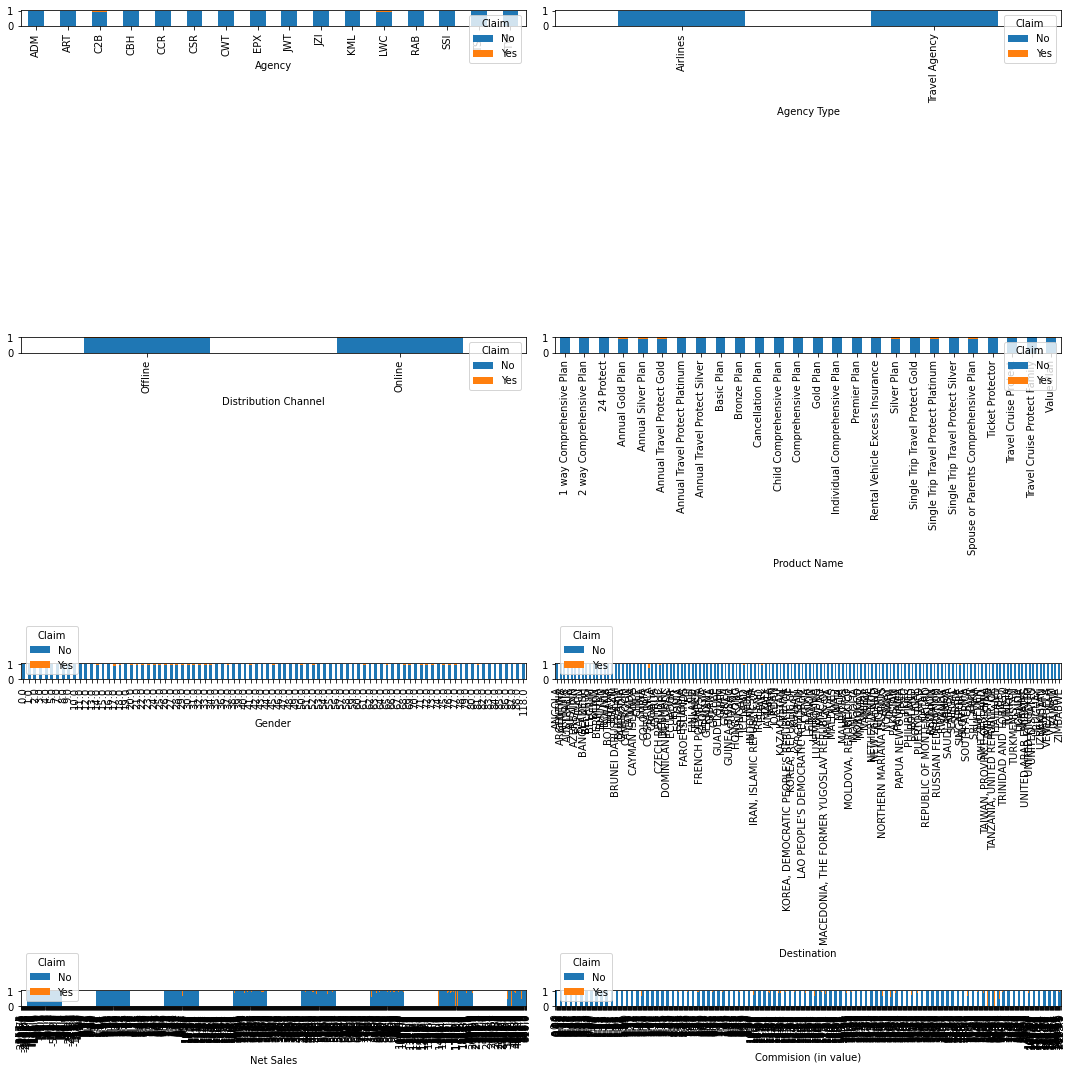

In [239]:
count = 0
fig = plt.figure(figsize=(15,15))

for i in df.drop(columns=['Claim','Age','Duration']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['Claim'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

In [240]:
for i in df.drop(columns=['Claim','Age','Duration']).columns:
    relevent_experience_df = df.groupby(i)['Claim'].value_counts(normalize=True).unstack()
    display(relevent_experience_df.sort_values(by=['Yes'], ascending=False))

Claim,No,Yes
Agency,,
C2B,0.923573,0.076427
LWC,0.935698,0.064302
KML,0.977778,0.022222
CCR,0.981982,0.018018
TTW,0.984127,0.015873
JWT,0.984791,0.015209
CSR,0.985294,0.014706
CBH,0.985507,0.014493
CWT,0.988427,0.011573


Claim,No,Yes
Agency Type,,
Airlines,0.960533,0.039467
Travel Agency,0.990843,0.009157


Claim,No,Yes
Distribution Channel,,
Online,0.981765,0.018235
Offline,0.984463,0.015537


Claim,No,Yes
Product Name,,
Annual Silver Plan,0.872315,0.127685
Annual Gold Plan,0.881481,0.118519
Annual Travel Protect Gold,0.888889,0.111111
Single Trip Travel Protect Platinum,0.893617,0.106383
Spouse or Parents Comprehensive Plan,0.923077,0.076923
Silver Plan,0.925977,0.074023
Annual Travel Protect Silver,0.932203,0.067797
Bronze Plan,0.938603,0.061397
Annual Travel Protect Platinum,0.941176,0.058824


Claim,No,Yes
Gender,,
17.0,0.866667,0.133333
14.0,0.923077,0.076923
81.0,0.941176,0.058824
77.0,0.947368,0.052632
69.0,0.951220,0.048780
...,...,...
84.0,1.000000,NaN
85.0,1.000000,NaN
86.0,1.000000,NaN


Claim,No,Yes
Destination,,
COSTA RICA,0.750000,0.250000
SINGAPORE,0.946922,0.053078
CZECH REPUBLIC,0.953488,0.046512
ICELAND,0.961039,0.038961
ISRAEL,0.969697,0.030303
...,...,...
UZBEKISTAN,1.000000,NaN
VANUATU,1.000000,NaN
VENEZUELA,1.000000,NaN


Claim,No,Yes
Net Sales,,
62.40,NaN,1.0
145.00,NaN,1.0
7.15,NaN,1.0
336.50,NaN,1.0
6.69,NaN,1.0
...,...,...
586.00,1.0,NaN
599.00,1.0,NaN
666.00,1.0,NaN


Claim,No,Yes
Commision (in value),,
44.50,NaN,1.0
57.75,NaN,1.0
67.75,NaN,1.0
26.63,NaN,1.0
74.26,NaN,1.0
...,...,...
186.71,1.0,NaN
208.16,1.0,NaN
209.95,1.0,NaN


In [241]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
2,JZI,Airlines,Online,Basic Plan,26.0,19,INDIA,22.0,7.7,26,No
4,C2B,Airlines,Online,Bronze Plan,28.0,8,SINGAPORE,16.0,4.0,28,No
6,EPX,Travel Agency,Online,1 way Comprehensive Plan,36.0,25,"KOREA, REPUBLIC OF",50.0,0.0,36,No
7,EPX,Travel Agency,Online,Cancellation Plan,22.0,90,SINGAPORE,78.0,0.0,22,No
8,JZI,Airlines,Online,Basic Plan,39.0,4,THAILAND,22.0,7.7,39,No


In [242]:
ordinal_mapping = [
    {'col':'Claim',
    'mapping':{
        'Yes'      :    1,
        'No'       :    0, 
    }}
]

In [243]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Agency','Agency_type', 'Gender', 'Duration', 'Destination', 'Commision (in value)', 'Age']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['Claim']),
    ('binary', ce.BinaryEncoder(), ['Age'])
], remainder='passthrough')

In [244]:
x = df.drop(columns=['Claim'])
y = df['Claim']

In [245]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

In [258]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [253]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [254]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Age', 'Gender']),
    ('Binary', ce.BinaryEncoder(), ['Claim'])
], remainder='passthrough')

In [255]:
X = df_model.drop(['Claim'], axis=1)
y = df_model['Claim']

In [256]:
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

Digunakan klasifikasi accuracy dikarenakan hasil yang diinginkan hanya ada 2 yaitu Yes dan No dan yang hanya perlu diinvestigasi yaitu jika terjadinya 
kejadian yang tidak diinginkan yaitu true positive (benar terjadinya kerugian pada pihak passanger tidak disengaja) dan false positive (benar terjadinya
kerugian pada pihak passanger dengan sengaja).

**Conclusion**

Dari hasil analisa yang telah dibuat, ada beberapa konklusi yaitu :
1. Missing value yang ada pada dataset sebesar 71 persen ada pada kolom gender
2. Commision (in value) berkorelasi dengan net sales paling tinggi
3. Jumlah claim berentan pada hasil NO dibanding YES tetapi tetap harus diselidiki kejadian yang tidak diinginkan itu

**Reccomendation**

1. Pihak asuransi perjalanan harus menerapkan dan memberi paham pada klien asuransi tentang semua polis yang ada dan berlaku
2. Pihak asuransi harus menginvestigasi kebenaran kejadian dari insiden yang dialami oleh penumpang (hilangnya bagasi, kecelakaan, insiden yang dicover lainnya)
3. Pihak asuransi harus bisa bertanggung jawab jika benarnya terjadi hal serupa dengan tidak disengaja.